<a href="https://colab.research.google.com/github/SriSharanya-617/datavisualization/blob/main/amazon_electronics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First 5 rows:
   item_id  user_id  rating   timestamp model_attr                category  \
0        0        0     5.0  1999-06-13     Female  Portable Audio & Video   
1        0        1     5.0  1999-06-14     Female  Portable Audio & Video   
2        0        2     3.0  1999-06-17     Female  Portable Audio & Video   
3        0        3     1.0  1999-07-01     Female  Portable Audio & Video   
4        0        4     2.0  1999-07-06     Female  Portable Audio & Video   

  brand  year user_attr  split  
0   NaN  1999       NaN      0  
1   NaN  1999       NaN      0  
2   NaN  1999       NaN      0  
3   NaN  1999       NaN      0  
4   NaN  1999       NaN      0  

Last 5 rows:
         item_id  user_id  rating   timestamp model_attr  \
1292949     9478  1157628     1.0  2018-09-26     Female   
1292950     9435  1157629     5.0  2018-09-26     Female

/tmp/ipython-input-3514154950.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(df['rating'].median(), inplace=True)
/tmp/ipython-input-3514154950.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True


Missing values after cleaning:
item_id       0
user_id       0
rating        0
timestamp     0
model_attr    0
category      0
brand         0
year          0
user_attr     0
split         0
dtype: int64

Brand with most products: Unknown (961834)
Total unique brands: 51

Number of products per category:
category
Headphones                 359334
Computers & Accessories    322938
Camera & Photo             192573
Accessories & Supplies     158598
Portable Audio & Video     143370
Car Electronics & GPS       33070
Television & Video          32057
Home Audio                  24193
Wearable Technology         16015
Security & Surveillance     10806
Name: count, dtype: int64

Entries per year:
year
1999       118
2000      3572
2001       702
2002       955
2003      3949
2004      7195
2005     11577
2006     16336
2007     17989
2008     28520
2009     54333
2010     50315
2011     87695
2012    139154
2013    161695
2014    275194
2015    364004
2016     54598
2017     10429
2018     

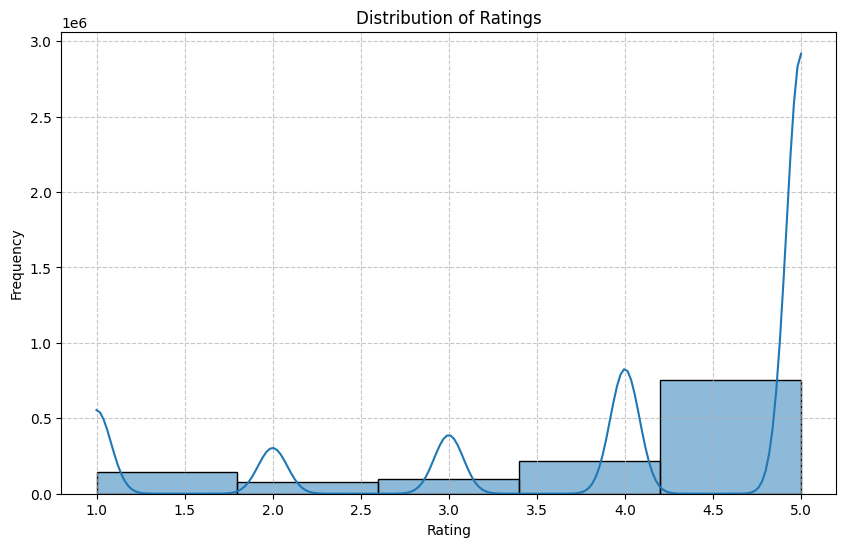

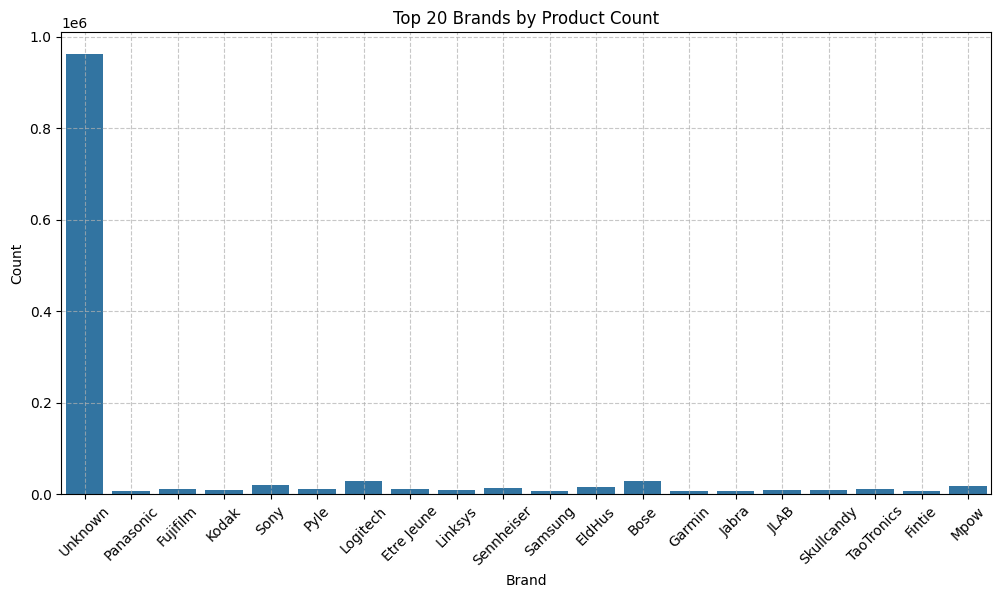

In [ ]:
# --- Mount Google Drive and load dataset ---
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')
path = '/content/drive/MyDrive/Amazon_electronics.csv'
df = pd.read_csv(path)

# --- Preview the dataset ---
print("First 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())
print("\nShape:", df.shape)
print("\nInfo:")
print(df.info())

# --- Task 2: Data Cleaning ---
# Fill missing numeric values (rating)
df['rating'].fillna(df['rating'].median(), inplace=True)

# Fill missing categorical values
categorical_cols = ['brand', 'category', 'user_attr']
for col in categorical_cols:
    df[col].fillna('Unknown', inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

# Check missing values after cleaning
print("\nMissing values after cleaning:")
print(df.isnull().sum())

# --- Task 3: Data Analysis ---
# Top brand by number of products
top_brand = df['brand'].value_counts().idxmax()
top_brand_count = df['brand'].value_counts().max()
print(f"\nBrand with most products: {top_brand} ({top_brand_count})")

# Number of unique brands
print(f"Total unique brands: {df['brand'].nunique()}")

# Category-wise count
print("\nNumber of products per category:")
print(df['category'].value_counts())

# Year-wise product count
print("\nEntries per year:")
print(df['year'].value_counts().sort_index())

# Brands with more than 50,000 products
large_brands = df['brand'].value_counts()[df['brand'].value_counts() > 50000]
print("\nBrands with more than 50,000 products:")
print(large_brands)

# Split column distribution
print("\nSplit column distribution:")
print(df['split'].value_counts())

# Missing 'user_attr'
print("\nMissing 'user_attr' values:", df['user_attr'].isnull().sum())

# --- Task 4: Feature Engineering & Filtering ---
# Popularity score based on rating
df['popularity_score'] = df['rating']  # Since no rating_count, we use rating only

# Top 10 products by popularity
top_10_score = df.nlargest(10, 'popularity_score')
print("\nTop 10 products by rating:")
print(top_10_score[['item_id','brand','category','rating']])

# Products with brand 'Unknown'
unknown_brand_products = df[df['brand'] == 'Unknown']
print("\nNumber of products with Unknown brand:", len(unknown_brand_products))

# Products filtered by category
category_filter = df[df['category'].str.contains('Audio', case=False, na=False)]
print("\nProducts in Audio category (sample 5):")
print(category_filter.head())

# --- Task 4C: Grouping ---
# Average rating per brand
avg_rating_per_brand = df.groupby('brand')['rating'].mean().sort_values(ascending=False)
print("\nAverage rating per brand:")
print(avg_rating_per_brand)

# Average rating per category
avg_rating_per_category = df.groupby('category')['rating'].mean().sort_values(ascending=False)
print("\nAverage rating per category:")
print(avg_rating_per_category)

# Top brand by average rating
top_avg_brand = avg_rating_per_brand.idxmax()
print("\nBrand with highest average rating:", top_avg_brand)

# --- Task 5: Visualization ---
plt.figure(figsize=(10,6))
sns.histplot(df['rating'], bins=5, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12,6))
top_brands_plot = df['brand'].value_counts().nlargest(20).index
sns.countplot(x='brand', data=df[df['brand'].isin(top_brands_plot)])
plt.xticks(rotation=45)
plt.title("Top 20 Brands by Product Count")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x='category', y='rating', data=df.groupby('category', as_index=False)['rating'].mean())
plt.xticks(rotation=45)
plt.title("Average Rating per Category")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10,8))
numeric_df = df[['rating', 'year']]
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Task 2 — Clean the Dataset
Identify missing values using .isnull().sum().
Fill missing numeric values (discount_price, rating, etc.) using mean or median.
Fill missing categorical values (brand, category) with "Unknown".
Remove all duplicate rows.
Convert numeric columns to their correct data types.
Reset index after cleaning.

Task 3 — Data Analysis
 Identify the top 5 most expensive products (actual_price).
Find the brand with the highest number of products.
Compute the average discount percentage for each brand.
Identify products with rating ≥ 4.5 and rating_count ≥ 2000.
Compute category-wise average price.

Task 4 — Programming Task: Feature Engineering + Logical Filters
Task 4A — Create New Columns
Write code to create:
discount_percent = ((actual_price - discount_price) / actual_price) * 100
price_category based on:
actual_price < 500 → "Budget"
500 ≤ price < 2000 → "Midrange"
price ≥ 2000 → "Premium"
popularity_score = rating * log(rating_count + 1)
Task 4B — Filtering Using New Columns
Using the newly created columns:
Show top 10 highest popularity_score products.
Show all Premium category items with discount_percent > 40%.
Show all products whose title contains "Bluetooth" (string filter).
Show products where:
rating >= 4.0
discount_percent between 20% to 50%
popularity_score in the top 30% percentile
(Use .between() and .quantile())
Task 4C — Grouping with New Columns
Find the average discount_percent for each brand.
Find the average popularity_score for each price_category.
Identify which category offers the highest average discount.
Calculate total revenue potential per brand using:
revenue_potential = actual_price * rating_count